# 판다스 (Pandas)

## Pandas 개요
- 데이터 분석과 관련된 다양한 기능을 제공하는 파이썬 패키지
    - 데이터 셋을 이용한 다양한 통계 처리 기능을 제공한다.
    - 표 형태의 데이터를 다루는데 특화된 파이썬 모듈.
        - 엑셀의 기능을 제공하는 파이썬 모듈이라고 생각하면 이해가 쉽다.
    - 표 형태의 데이터를 다루기 위한 **시리즈(Series)**와 **데이터프레임(DataFrame)** 클래스 제공
        - Series : 1차원 자료구조를 표현
        - DataFrame : 행렬의 표를 표현
- https://pandas.pydata.org/


# Series

## Series 개요
- 1차원 자료구조
- DataFrame(표)의 한 행이나 한 열을 표현한다.
- 각 원소는 index로 접근할 수 있다.
    - index는 순번과 명시적 이름 사용가능.
    - 순번은 0부터 1씩 증가하는 정수.
    - index명은 명시적으로 지정할 수 있다.
    - index명을 명시적으로 지정하지 않으면 순번이 index명이 된다.
- 벡터화 연산을 지원
    - Series 객체에 연산을 하면 각각의 Series 원소들에 연산이 된다.
- 원소들을 다루는 다양한 메소드 제공    

## Series생성
- 구문
    - `Series(배열형태 자료구조)`
> #### 배열형태 자료구조    
> - 리스트
> - 튜플
> - 넘파이 배열(ndarray)

In [2]:
import pandas as pd
import numpy as np

In [3]:
s1=pd.Series([10,20,30,40,50])  # index명이 자동으로 설정되어 반환
s1

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [4]:
s2=pd.Series([10,20,30], index=['A','B','C'])  # index명 설정 가능
s2

A    10
B    20
C    30
dtype: int64

In [5]:
s2['A'], s2[0]  # 설정한 index명 또는 순번 둘 다 조회 가능

(10, 10)

In [7]:
s3=pd.Series([80,550], index=['평균점수','합계'])
s3

평균점수     80
합계      550
dtype: int64

In [8]:
s3[0], s3['평균점수']

(80, 80)

## Series안의 원소(element) 접근
### Indexing
- Series[순번]
- Series[index명]
- Series.index명  (이 경우는 index명이 변수로 사용가능할때만)
- Series[ index리스트] 
    - 팬시(fancy) 인덱싱: 여러 원소 조회 시 조회할 index를 list로 전달
    
### Slicing
- Series[start index :  end index : step]
    - start index 생략 : 0번 부터
    - end index는 포함 안됨. 
    - end index 생략 : 마지막 index까지
    - step 생략 : 1씩 증가
- **Slicing의 결과는 원본의 참조(View)를 반환**
    - slicing한 결과를 변경시 원본도 같이 바뀐다.
    - Series.copy() : Series를 복사한 새로운 객체 반환

In [2]:
import pandas as pd
import numpy as np
s1=pd.Series(np.arange(10))
s1

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

In [5]:
s1[0], s1[5]

(0, 5)

In [7]:
s1[20]  # 존재하지 않는 index는 조회시 에러: KeyError

KeyError: 20

In [3]:
s1[0]=100  # 변경
s1.head(3) # .head: 앞에서부터 값 3개 반환

0    100
1      1
2      2
dtype: int32

In [11]:
s1.5  # index로 조회시 구문 에러 발생

SyntaxError: invalid syntax (<ipython-input-11-7d3a21c57f38>, line 1)

In [14]:
s2=pd.Series([80,1000], index=['평균 점수','총점'])
s2

평균 점수      80
총점       1000
dtype: int64

In [15]:
s2["평균 점수"], s2['총점']  # index명에 띄어쓰기가 포함되어 있으면 " "사용

(80, 1000)

In [16]:
s2.총점 # index명을 설정한 경우에는 .index명 사용 가능

1000

In [17]:
s2.평균 점수 # 표기법은 index명이 식별자 규칙에 맞게 생성된 것이어야 가능 - 띄어쓰기가 문제
             # (Series의 속성/함수와 이름이 달라야 함)

SyntaxError: invalid syntax (<ipython-input-17-7e210d53bc5f>, line 1)

In [19]:
s1[[2,5,6]]  # index가 2,5,6번인 값들 조회 -> 여러 index 조회시 [ ]에 넣어 조회 -> fancy indexing

2    2
5    5
6    6
dtype: int32

In [5]:
s1[2:8:2] # 2~ 8-1, 2씩 증가

2    2
4    4
6    6
dtype: int32

In [6]:
s1[8:1:-2]

8    8
6    6
4    4
2    2
dtype: int32

In [8]:
s2=pd.Series(np.arange(7), index=['k','j','a','r','s','b','w'])
s2

k    0
j    1
a    2
r    3
s    4
b    5
w    6
dtype: int32

In [10]:
s2['j':'s'] # index명으로 slicing하면 end index가 포함된다.

j    1
a    2
r    3
s    4
dtype: int32

In [12]:
s2['j':'b':2] # j부터 b까지 2개씩 건너뜀

j    1
r    3
b    5
dtype: int32

In [13]:
s3=pd.Series(np.arange(7), index=['k','j','a','r','s','a','w'])

In [9]:
s2[1:5] # 순번

j    1
a    2
r    3
s    4
dtype: int32

In [18]:
s3=pd.Series(np.arange(7), index=['k','j','a','r','r','a','w'])
s3 # 같은 index명이 여러개 존재 가능

k    0
j    1
a    2
r    3
r    4
a    5
w    6
dtype: int32

In [16]:
s3['a']

a    2
a    5
dtype: int32

In [20]:
s3['j':'a']  # 같은 index명으로 slicing할 경우 에러 발생

KeyError: "Cannot get right slice bound for non-unique label: 'a'"

In [21]:
s3['j':'r'] # 단 같은 index명이 연속적으로 붙어있는 경우에는 조회 가능

j    1
a    2
r    3
r    4
dtype: int32

In [24]:
s2=s1[3:7]
s2

3    3
4    4
5    5
6    6
dtype: int32

In [25]:
s2[3]  # index명이 3인것

3

In [27]:
#s2[0] # index명 숫자의 값으로 따로 존재하는 경우에는 순번으로 조회 불가
        # (순번과 index명이 같은 경우에는 순번으로 조회 가능)
    
s2.iloc[0]  # iloc indexer: 순번으로 조회 (index locate)

3

### Indexing, Slicing을 이용한 값 변경

In [42]:
s1[0]=1000
s1

0    1000
1       1
2    3000
3    3000
4    3000
5    2000
6    2000
7       7
8       8
9    2000
dtype: int32

In [43]:
s1[[0,5,6,9]]=2000  # 여러 index를 한번에 변경
s1

0    2000
1       1
2    3000
3    3000
4    3000
5    2000
6    2000
7       7
8       8
9    2000
dtype: int32

In [44]:
s1[2:5]=3000  # slicing으로 2~5까지 변경
s1

0    2000
1       1
2    3000
3    3000
4    3000
5    2000
6    2000
7       7
8       8
9    2000
dtype: int32

In [45]:
s2=s1[2:5]
s2

2    3000
3    3000
4    3000
dtype: int32

In [38]:
# s2[0]=1  # s2[0]: 조회불가, s2[0]=1 값 추가
# s2

2    3000
3    3000
4    3000
0       1
dtype: int64

In [46]:
s2[2]=10
s2

2      10
3    3000
4    3000
dtype: int32

In [47]:
s1 # s2가 변경되면 s1도 함께 변경됨, 원본은 변경하지 않게 하려면 copy처리

0    2000
1       1
2      10
3    3000
4    3000
5    2000
6    2000
7       7
8       8
9    2000
dtype: int32

In [48]:
s3=s1[:5].copy()

## Boolean 인덱싱
- Series 의 indexing 연산자에 boolean 리스트를 넣으면 "True"인 index의 값들만 조회한다. 
    - Boolean 연산자들을 이용해 원하는 조건의 값들을 조회할 수 있다
    - 다중 조건인 경우 반드시 ( )로 조건을 묶어야 한다.
    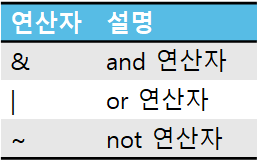
    
    - 파이썬과는 다르게 `and`, `or` 예약어는 사용할 수 없다.

In [63]:
s=pd.Series(np.random.randint(10,size=10))
s

0    1
1    0
2    8
3    9
4    9
5    1
6    9
7    6
8    8
9    2
dtype: int32

In [65]:
s[(s>5) & (s<9)]

2    8
7    6
8    8
dtype: int32

In [68]:
s[~((s>5) & (s<9))]

0    1
1    0
3    9
4    9
5    1
6    9
9    2
dtype: int32

In [69]:
np.where((s>5) & (s<9))  # 조건에 해당되는 index 반환

(array([2, 7, 8], dtype=int64),)

## 주요 메소드
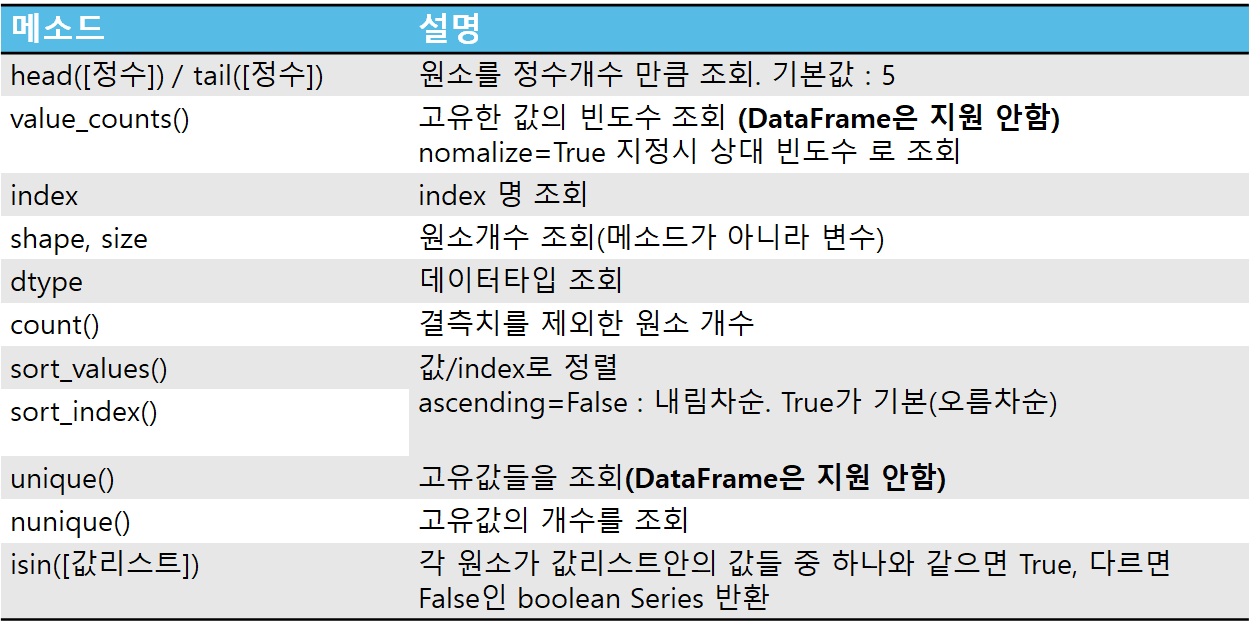

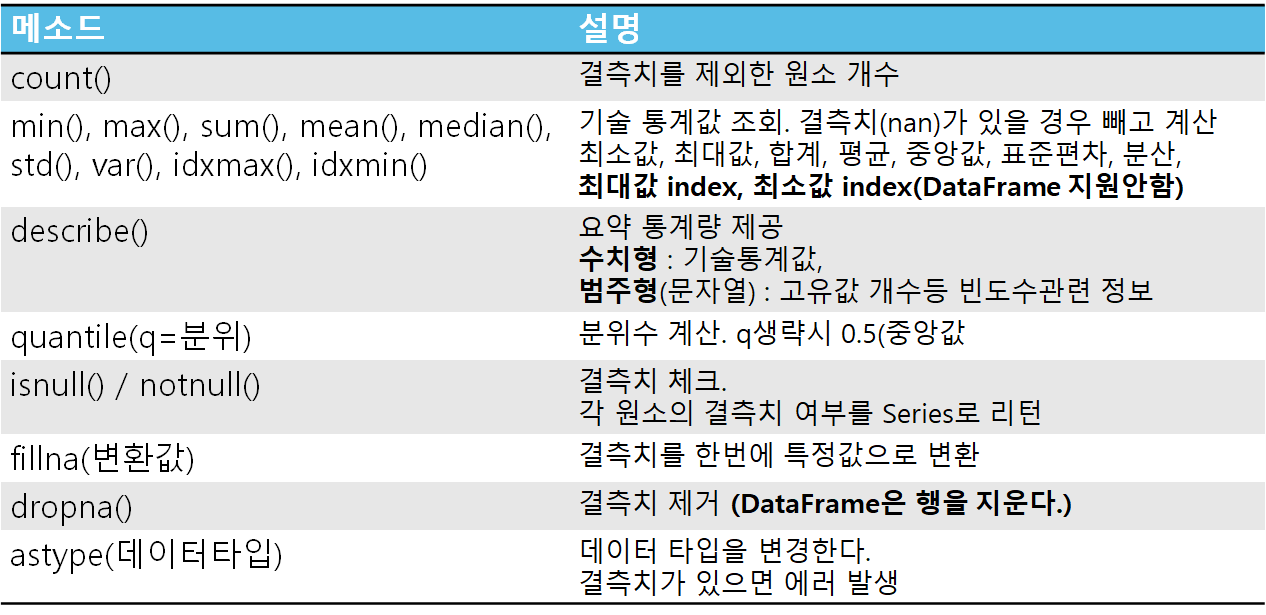

In [70]:
import pandas as pd
import numpy as np

In [73]:
s1=pd.Series(np.arange(100))
print(s1.shape) # Series의 형태
print(s1.size)  # 원소의 개수(결측치 - NAN을 포함)

(100,)
100


In [75]:
s1.head()  # 처음 몇개만 조회함(기본 5개)

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [76]:
s1.head(10) 

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

In [77]:
s1.tail()  # 뒤에 몇개 (기본 5개)

95    95
96    96
97    97
98    98
99    99
dtype: int32

In [78]:
s2=pd.Series(['A','B','O','AB','B','AB','O','O','NU-ABO'])
s2.value_counts()

O         3
B         2
AB        2
NU-ABO    1
A         1
dtype: int64

In [80]:
s2.value_counts()['B']  # B의 개수 조회

2

In [82]:
s2.value_counts(normalize=True) # 비율

O         0.333333
B         0.222222
AB        0.222222
NU-ABO    0.111111
A         0.111111
dtype: float64

In [84]:
s2.unique()

array(['A', 'B', 'O', 'AB', 'NU-ABO'], dtype=object)

In [85]:
s2.nunique() # 고유값들의 개수

5

In [87]:
s3=s2.sort_values() # 값을 기준으로 정렬 (오름차순-기본, 내림차순) - 정렬된 카피본을 반환 (원본변경x)
s3

0         A
3        AB
5        AB
1         B
4         B
8    NU-ABO
2         O
6         O
7         O
dtype: object

In [91]:
s2.sort_values(ascending=False, inplace=True)  # ascending=False: 내림차순, inplace=True: 원본에 적용
s2

2         O
6         O
7         O
8    NU-ABO
1         B
4         B
3        AB
5        AB
0         A
dtype: object

In [92]:
s2.sort_index()  # index 기준으로 오름차순 정렬

0         A
1         B
2         O
3        AB
4         B
5        AB
6         O
7         O
8    NU-ABO
dtype: object

In [96]:
s3=s2.sort_index(ascending=False) # index기준으로 내림차순 정렬 -정렬된 카피본을 반환 (원본변경x)
s3

8    NU-ABO
7         O
6         O
5        AB
4         B
3        AB
2         O
1         B
0         A
dtype: object

In [115]:
s2.sort_index(inplace=True) # 원본에 적용
s2

0         A
1       NaN
2         O
3        AB
4         B
5        AB
6         O
7         O
8    NU-ABO
dtype: object

#### 통계함수
- 결측치(NaN)처리: NaN은 제외하고 계산

In [98]:
# 판다스 결측치 - None, np.NAN, np.nan 같은 결과
s1[0]=None
s1[3]=np.NAN
s1[4]=np.nan
s1.head()

0    NaN
1    1.0
2    2.0
3    NaN
4    NaN
dtype: float64

In [100]:
s1.size, s1.count()  # size: 총 원소, count(): 결측치를 제외한 원소수

(100, 97)

In [103]:
# 판다스 기술통계함수는 결측치가 있으면 제외하고 계산.
# skipna=True: 결측치 제외하고 계산, skipna=False: 결측치 포함하여 결측치가 있는 경우 NAN 반환
s1.mean(), s1.mean(skipna=False) 

(50.95876288659794, nan)

In [106]:
s1.var(), s1.std(), np.round(s1.std(),2) # round: 반올림

(796.2066151202748, 28.21713336113849, 28.22)

In [107]:
s1.var(), s1.std(skipna=False), np.round(s1.std(),2)

(796.2066151202748, nan, 28.22)

In [109]:
s1.max(), s1.idxmax() #최대값, 최대값의 index

(99.0, 99)

In [110]:
s1.min(), s1.idxmin()

(1.0, 1)

In [111]:
s1.quantile(), s1.median()  # q = 분위지정. 기본: 0.5 => 중위수

(51.0, 51.0)

In [112]:
s1.quantile(q=[0.25, 0.5, 0.75])

0.25    27.0
0.50    51.0
0.75    75.0
dtype: float64

In [113]:
s1.sum()

4943.0

In [120]:
s2.sum() # 문자열

TypeError: can only concatenate str (not "int") to str

In [117]:
s1.describe()  # 몇몇 통계값들을 묶어서 보여준다.

count    97.000000
mean     50.958763
std      28.217133
min       1.000000
25%      27.000000
50%      51.000000
75%      75.000000
max      99.000000
dtype: float64

In [119]:
s2.describe()

count     8
unique    5
top       O
freq      3
dtype: object

In [118]:
s1.isnull() # 원소별로 NA인지 확인 - NA: True

0      True
1     False
2     False
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
90    False
91    False
92    False
93    False
94    False
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [122]:
s1.notnull()  # NA: False

0     False
1      True
2      True
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
      ...  
70     True
71     True
72     True
73     True
74     True
75     True
76     True
77     True
78     True
79     True
80     True
81     True
82     True
83     True
84     True
85     True
86     True
87     True
88     True
89     True
90     True
91     True
92     True
93     True
94     True
95     True
96     True
97     True
98     True
99     True
Length: 100, dtype: bool

In [123]:
s1.isnull().sum()  # boolean 시리즈를 sum() -> True:1, False:0 으로 바꾼 뒤 계산

3

결측치 처리 - 대체: fillna(대체할 값)

제거: dropna()

In [124]:
s1

0      NaN
1      1.0
2      2.0
3      NaN
4      NaN
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22    22.0
23    23.0
24    24.0
25    25.0
26    26.0
27    27.0
28    28.0
29    29.0
      ... 
70    70.0
71    71.0
72    72.0
73    73.0
74    74.0
75    75.0
76    76.0
77    77.0
78    78.0
79    79.0
80    80.0
81    81.0
82    82.0
83    83.0
84    84.0
85    85.0
86    86.0
87    87.0
88    88.0
89    89.0
90    90.0
91    91.0
92    92.0
93    93.0
94    94.0
95    95.0
96    96.0
97    97.0
98    98.0
99    99.0
Length: 100, dtype: float64

In [126]:
s1.fillna(s1.mean())  # 결측치를 평균값으로 변경

0     50.958763
1      1.000000
2      2.000000
3     50.958763
4     50.958763
5      5.000000
6      6.000000
7      7.000000
8      8.000000
9      9.000000
10    10.000000
11    11.000000
12    12.000000
13    13.000000
14    14.000000
15    15.000000
16    16.000000
17    17.000000
18    18.000000
19    19.000000
20    20.000000
21    21.000000
22    22.000000
23    23.000000
24    24.000000
25    25.000000
26    26.000000
27    27.000000
28    28.000000
29    29.000000
        ...    
70    70.000000
71    71.000000
72    72.000000
73    73.000000
74    74.000000
75    75.000000
76    76.000000
77    77.000000
78    78.000000
79    79.000000
80    80.000000
81    81.000000
82    82.000000
83    83.000000
84    84.000000
85    85.000000
86    86.000000
87    87.000000
88    88.000000
89    89.000000
90    90.000000
91    91.000000
92    92.000000
93    93.000000
94    94.000000
95    95.000000
96    96.000000
97    97.000000
98    98.000000
99    99.000000
Length: 100, dtype: floa

In [127]:
s1.fillna(s1.median())  # 중앙값으로 변경

0     51.0
1      1.0
2      2.0
3     51.0
4     51.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22    22.0
23    23.0
24    24.0
25    25.0
26    26.0
27    27.0
28    28.0
29    29.0
      ... 
70    70.0
71    71.0
72    72.0
73    73.0
74    74.0
75    75.0
76    76.0
77    77.0
78    78.0
79    79.0
80    80.0
81    81.0
82    82.0
83    83.0
84    84.0
85    85.0
86    86.0
87    87.0
88    88.0
89    89.0
90    90.0
91    91.0
92    92.0
93    93.0
94    94.0
95    95.0
96    96.0
97    97.0
98    98.0
99    99.0
Length: 100, dtype: float64

## 벡터화 (연산)
- Numpy 배열(ndarray)과 마찬가지로 Series 객체과 연산을 하면 Series 내의 원소 별 연산을 한다.

In [128]:
x=pd.Series([1,2,3,4,5])
y=pd.Series([10,20,30,40,50])

In [129]:
x*100

0    100
1    200
2    300
3    400
4    500
dtype: int64

In [130]:
x+y

0    11
1    22
2    33
3    44
4    55
dtype: int64

In [133]:
x*y

0     10
1     40
2     90
3    160
4    250
dtype: int64

In [134]:
x@y

550

In [140]:
np.round(x/y)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64